In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import random
RS = 27
random.seed(RS)
np.random.seed(RS)

In [3]:
# Read training data. 
# Inspections of restaurants
scores_known = pd.read_csv('../code/data/facility_scores_known.csv')
scores_known.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,...,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,...,Non-inspection site visit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
scores_known.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43199 entries, 0 to 43198
Data columns (total 23 columns):
business_id                  43199 non-null int64
business_name                43199 non-null object
business_address             43199 non-null object
business_city                43199 non-null object
business_state               43199 non-null object
business_postal_code         42245 non-null object
business_latitude            22015 non-null float64
business_longitude           22015 non-null float64
business_location            22015 non-null object
business_phone_number        14144 non-null float64
inspection_id                43199 non-null object
inspection_date              43199 non-null object
inspection_score             31650 non-null float64
inspection_type              43199 non-null object
violation_id                 32218 non-null object
violation_description        32218 non-null object
risk_category                32218 non-null object
Neighborhoods (old)  

In [5]:
scores_unknown = pd.read_csv('../code/data/facility_scores_unknown.csv')
scores_unknown.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,97748,FISTFUL OF TACOS,201 Harrison St Unit C-2,San Francisco,CA,94105,NaN,NaN,NaN,1.415046e+10,...,Reinspection/Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101082,Tony's Pizza North 200,1 Warriors Way Level 300 North,San Francisco,CA,94158,NaN,NaN,NaN,NaN,...,New Ownership - Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN
3,78070,Uno Dos Taco,595 Market St Suite 160,San Francisco,CA,94105,NaN,NaN,NaN,NaN,...,Reinspection/Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,95174,Ahipoki Bowl,1511 Sloat Blvd,San Francisco,CA,94132,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,95174_20180417_103133,Foods not protected from contamination,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
scores_unknown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 23 columns):
business_id                  10774 non-null int64
business_name                10774 non-null object
business_address             10774 non-null object
business_city                10774 non-null object
business_state               10774 non-null object
business_postal_code         10542 non-null object
business_latitude            5460 non-null float64
business_longitude           5460 non-null float64
business_location            5460 non-null object
business_phone_number        3528 non-null float64
inspection_id                10774 non-null object
inspection_date              10774 non-null object
inspection_score             0 non-null float64
inspection_type              10774 non-null object
violation_id                 8035 non-null object
violation_description        8035 non-null object
risk_category                8035 non-null object
Neighborhoods (old)          545

In [7]:
# Drop the rows that have no inspection score. 
score_cleaned = scores_known.dropna(subset=['inspection_score'])
score_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31650 entries, 1 to 43198
Data columns (total 23 columns):
business_id                  31650 non-null int64
business_name                31650 non-null object
business_address             31650 non-null object
business_city                31650 non-null object
business_state               31650 non-null object
business_postal_code         30983 non-null object
business_latitude            17259 non-null float64
business_longitude           17259 non-null float64
business_location            17259 non-null object
business_phone_number        10122 non-null float64
inspection_id                31650 non-null object
inspection_date              31650 non-null object
inspection_score             31650 non-null float64
inspection_type              31650 non-null object
violation_id                 30010 non-null object
violation_description        30010 non-null object
risk_category                30010 non-null object
Neighborhoods (old)  

In [8]:
# Narrow down the columns. 
# A. score_data = score_cleaned[['violation_description', 'risk_category', 'inspection_score']]
# B. score_data = score_cleaned[['violation_description', 'risk_category', 'inspection_score', 'business_latitude', 'business_longitude']]
# C. score_data = score_cleaned[['inspection_type', 'violation_description', 'risk_category', 'inspection_score', 'business_postal_code', 'business_latitude', 'business_longitude']]
# D. score_data = score_cleaned[['violation_description', 'risk_category', 'inspection_score', 'business_postal_code', 'business_latitude', 'business_longitude']]
# E. score_data = score_cleaned[['violation_description', 'risk_category', 
#                                'business_postal_code', 'business_latitude', 'business_longitude', 
#                                'inspection_score', 
#                                'Neighborhoods (old)', 'Police Districts', 'Supervisor Districts', 
#                                'Fire Prevention Districts', 'Zip Codes', 'Analysis Neighborhoods']]
# F. score_data = score_cleaned[['business_address', 'violation_description', 'risk_category', 
#                                'business_postal_code', 'business_latitude', 'business_longitude', 
#                                'inspection_score', 
#                                'Neighborhoods (old)', 'Police Districts', 'Supervisor Districts', 
#                                'Fire Prevention Districts', 'Zip Codes', 'Analysis Neighborhoods']]
# G. score_data = score_cleaned[['business_address', 'violation_description', 'risk_category', 
#                     'business_postal_code', 'business_latitude', 'business_longitude', 'inspection_score']]

# H.
score_data = score_cleaned[['business_name', 'business_address', 'violation_description', 'risk_category', 
                               'business_postal_code', 'business_latitude', 'business_longitude', 
                               'inspection_score', 
                               'Neighborhoods (old)', 'Police Districts', 'Supervisor Districts', 
                               'Fire Prevention Districts', 'Zip Codes', 'Analysis Neighborhoods']]

score_data_test = scores_unknown[['business_name', 'business_address', 'violation_description', 'risk_category', 
                               'business_postal_code', 'business_latitude', 'business_longitude', 
                               'inspection_score', 
                               'Neighborhoods (old)', 'Police Districts', 'Supervisor Districts', 
                               'Fire Prevention Districts', 'Zip Codes', 'Analysis Neighborhoods']]

# # I.
# score_data = score_cleaned[['business_name', 'business_address', 'violation_description', 'risk_category', 
#                                'business_postal_code', 'business_latitude', 'business_longitude', 
#                                'inspection_score']]

score_data_test.head()

,business_name,business_address,violation_description,risk_category,business_postal_code,business_latitude,business_longitude,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,FISTFUL OF TACOS,201 Harrison St Unit C-2,NaN,NaN,94105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tony's Pizza North 200,1 Warriors Way Level 300 North,NaN,NaN,94158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pronto Pizza,798 Eddy St,High risk vermin infestation,High Risk,94109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Uno Dos Taco,595 Market St Suite 160,NaN,NaN,94105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ahipoki Bowl,1511 Sloat Blvd,Foods not protected from contamination,Moderate Risk,94132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Fill missing latitude and longitude with median.  
score_data['business_latitude'] = score_data['business_latitude'].fillna(score_data['business_latitude'].median())
score_data['business_latitude'].isnull().sum()

score_data_test['business_latitude'] = score_data_test['business_latitude'].fillna(score_data_test['business_latitude'].median())
score_data_test['business_latitude'].isnull().sum()

/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0

In [10]:
score_data['business_longitude'] = score_data['business_longitude'].fillna(score_data['business_longitude'].median())
score_data['business_longitude'].isnull().sum()

score_data_test['business_longitude'] = score_data_test['business_longitude'].fillna(score_data_test['business_longitude'].median())
score_data_test['business_longitude'].isnull().sum()

/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0

In [11]:
# Create Grade Point for business name based on their inspection score on the training set.  
s = score_data.groupby('business_name')['inspection_score'].mean()
gp_map = dict(s)
gp_map

{'#1 VERJUS CAVE, #2 VERJUS': 100.0,
 '111 Minna Gallery': 94.0,
 '12 Tribes Kosher Foods': 98.0,
 '1428 Haight': 77.0,
 '15 Romolo': 88.0,
 '1601 Bar & Kitchen': 84.0,
 '1608 Bistro': 77.88888888888889,
 '1760': 95.33333333333333,
 '17th & Noe Market': 96.0,
 '18 Reasons': 95.0,
 '18th Street Commissary': 81.2,
 '19th Ave Shell': 91.33333333333333,
 '20 Spot Mission, LLC': 90.0,
 '20th Century Cafe': 95.33333333333333,
 '21 Taste House': 83.0,
 '21ST AMENDMENT BREWERY CAFE': 86.66666666666667,
 '2227 Irving Seafood Market Inc': 78.875,
 '24 HR CONVENIENCE MKT': 100.0,
 '24TH STREET CHEESE COMPANY': 95.0,
 '24th and Folsom Eatery': 92.0,
 '260 Golden Gate Family Residence': 98.0,
 '333 Truck': 90.0,
 '360 Gourmet Burrito': 90.66666666666667,
 '3Geeks': 92.0,
 '3RD BAPTIST FELLOWSHIP HALL': 98.0,
 '3rd Cousin': 93.5,
 '3rd Floor Banquet Kitchen': 88.4,
 '4505 Burgers and BBQ': 83.0,
 '49 Square Catering': 92.5,
 '499 Taproot': 92.0,
 '5 Degree Tea House': 87.42857142857143,
 '505 Pinter

In [12]:
median = score_data['inspection_score'].median()
median

87.0

In [13]:
def create_gp(x): 
    if x in gp_map: 
        return gp_map[x]
    else: 
        return median

score_data['grade_point'] = score_data['business_name'].map(create_gp)

score_data_test['grade_point'] = score_data_test['business_name'].map(create_gp)

score_data['grade_point']

/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


1        96.000000
2        92.000000
4        95.000000
7        86.750000
8        96.666667
           ...    
43193    80.888889
43194    88.875000
43196    92.391304
43197    80.888889
43198    88.875000
Name: grade_point, Length: 31650, dtype: float64

In [14]:
# Min-max scaling 
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
score_data['grade_point'] = min_max_scaler.fit_transform(score_data[['grade_point']])
score_data

/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,business_name,business_address,violation_description,risk_category,business_postal_code,business_latitude,business_longitude,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods,grade_point
1,BREADBELLY,1408 Clement St,Inadequately cleaned or sanitized food contact...,Moderate Risk,94118,37.780193,-122.418985,96.0,NaN,NaN,NaN,NaN,NaN,NaN,0.913043
2,Hakkasan San Francisco,1 Kearny St,Inadequate and inaccessible handwashing facili...,Moderate Risk,94108,37.780193,-122.418985,88.0,NaN,NaN,NaN,NaN,NaN,NaN,0.826087
4,Tselogs,552 Jones St,Improper thawing methods,Moderate Risk,94102,37.780193,-122.418985,94.0,NaN,NaN,NaN,NaN,NaN,NaN,0.891304
7,"The Estate Kitchen, LLC",799 Bryant St,Improper food storage,Low Risk,94107,37.780193,-122.418985,86.0,NaN,NaN,NaN,NaN,NaN,NaN,0.711957
8,Beloved Cafe,3338 24th St,Low risk vermin infestation,Low Risk,94110,37.780193,-122.418985,96.0,NaN,NaN,NaN,NaN,NaN,NaN,0.927536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43193,El Gran Taco Loco,4591 Mission St.,Insufficient hot water or running water,Moderate Risk,94112,37.780193,-122.418985,76.0,NaN,NaN,NaN,NaN,NaN,NaN,0.584541
43194,Blue Bottle Coffee,2 South Park,Inadequately cleaned or sanitized food contact...,Moderate Risk,94107,37.780193,-122.418985,80.0,NaN,NaN,NaN,NaN,NaN,NaN,0.758152
43196,Philz Coffee,300 Folsom St,Foods not protected from contamination,Moderate Risk,94105,37.780193,-122.418985,92.0,NaN,NaN,NaN,NaN,NaN,NaN,0.834594
43197,El Gran Taco Loco,4591 Mission St.,Inadequate food safety knowledge or lack of ce...,Moderate Risk,94112,37.780193,-122.418985,76.0,NaN,NaN,NaN,NaN,NaN,NaN,0.584541


In [15]:
# Min-max scale on validation set using the scaler that is created by training set.  
score_data_test['grade_point'] = min_max_scaler.transform(score_data_test[['grade_point']])

score_data_test

/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,business_name,business_address,violation_description,risk_category,business_postal_code,business_latitude,business_longitude,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods,grade_point
0,FISTFUL OF TACOS,201 Harrison St Unit C-2,NaN,NaN,94105,37.780383,-122.4194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.630435
1,Tony's Pizza North 200,1 Warriors Way Level 300 North,NaN,NaN,94158,37.780383,-122.4194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.717391
2,Pronto Pizza,798 Eddy St,High risk vermin infestation,High Risk,94109,37.780383,-122.4194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.574534
3,Uno Dos Taco,595 Market St Suite 160,NaN,NaN,94105,37.780383,-122.4194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.559497
4,Ahipoki Bowl,1511 Sloat Blvd,Foods not protected from contamination,Moderate Risk,94132,37.780383,-122.4194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.869565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10769,PERILLA,510 Mission St,Improper cooling methods,High Risk,94105,37.780383,-122.4194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.673913
10770,The Douglas Room,345 Taylor St,High risk food holding temperature,High Risk,94102,37.780383,-122.4194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.902174
10771,Celtic Coffee Company,142 McAllister St,NaN,NaN,94102,37.780383,-122.4194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.555556
10772,City Discount Meat & Grocery Market,2298 Mission St,NaN,NaN,94110,37.780383,-122.4194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.398169


In [16]:
score_data['org'] = 1
score_data_test['org'] = 0

/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
# Concatenate dataframes. 
score_data_concat = pd.concat([score_data, score_data_test])
score_data_concat.head()

,business_name,business_address,violation_description,risk_category,business_postal_code,business_latitude,business_longitude,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods,grade_point,org
1,BREADBELLY,1408 Clement St,Inadequately cleaned or sanitized food contact...,Moderate Risk,94118,37.780193,-122.418985,96.0,NaN,NaN,NaN,NaN,NaN,NaN,0.913043,1
2,Hakkasan San Francisco,1 Kearny St,Inadequate and inaccessible handwashing facili...,Moderate Risk,94108,37.780193,-122.418985,88.0,NaN,NaN,NaN,NaN,NaN,NaN,0.826087,1
4,Tselogs,552 Jones St,Improper thawing methods,Moderate Risk,94102,37.780193,-122.418985,94.0,NaN,NaN,NaN,NaN,NaN,NaN,0.891304,1
7,"The Estate Kitchen, LLC",799 Bryant St,Improper food storage,Low Risk,94107,37.780193,-122.418985,86.0,NaN,NaN,NaN,NaN,NaN,NaN,0.711957,1
8,Beloved Cafe,3338 24th St,Low risk vermin infestation,Low Risk,94110,37.780193,-122.418985,96.0,NaN,NaN,NaN,NaN,NaN,NaN,0.927536,1


In [18]:
score_data_concat.tail()

,business_name,business_address,violation_description,risk_category,business_postal_code,business_latitude,business_longitude,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods,grade_point,org
10769,PERILLA,510 Mission St,Improper cooling methods,High Risk,94105,37.780383,-122.4194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.673913,0
10770,The Douglas Room,345 Taylor St,High risk food holding temperature,High Risk,94102,37.780383,-122.4194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.902174,0
10771,Celtic Coffee Company,142 McAllister St,NaN,NaN,94102,37.780383,-122.4194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.555556,0
10772,City Discount Meat & Grocery Market,2298 Mission St,NaN,NaN,94110,37.780383,-122.4194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.398169,0
10773,Blue Bottle Coffee,2 South Park,Moderate risk food holding temperature,Moderate Risk,94107,37.780383,-122.4194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.758152,0


In [19]:
score_data_test.iloc[-1]

business_name                                    Blue Bottle Coffee
business_address                                       2 South Park
violation_description        Moderate risk food holding temperature
risk_category                                         Moderate Risk
business_postal_code                                          94107
business_latitude                                           37.7804
business_longitude                                         -122.419
inspection_score                                                NaN
Neighborhoods (old)                                             NaN
Police Districts                                                NaN
Supervisor Districts                                            NaN
Fire Prevention Districts                                       NaN
Zip Codes                                                       NaN
Analysis Neighborhoods                                          NaN
grade_point                                     

In [20]:
score_data_concat.iloc[-1]

business_name                                    Blue Bottle Coffee
business_address                                       2 South Park
violation_description        Moderate risk food holding temperature
risk_category                                         Moderate Risk
business_postal_code                                          94107
business_latitude                                           37.7804
business_longitude                                         -122.419
inspection_score                                                NaN
Neighborhoods (old)                                             NaN
Police Districts                                                NaN
Supervisor Districts                                            NaN
Fire Prevention Districts                                       NaN
Zip Codes                                                       NaN
Analysis Neighborhoods                                          NaN
grade_point                                     

In [21]:
# Define the ordinal scale of 'risk_category' column. 
score_data_concat['risk_category'] = score_data_concat['risk_category'].fillna('Good')
risk_mapping = {'High Risk': 0, 'Moderate Risk': 1, 'Low Risk': 2, 'Good': 3}
score_data_concat['risk_category'] = score_data_concat['risk_category'].map(risk_mapping)

score_data_concat.head()

,business_name,business_address,violation_description,risk_category,business_postal_code,business_latitude,business_longitude,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods,grade_point,org
1,BREADBELLY,1408 Clement St,Inadequately cleaned or sanitized food contact...,1,94118,37.780193,-122.418985,96.0,NaN,NaN,NaN,NaN,NaN,NaN,0.913043,1
2,Hakkasan San Francisco,1 Kearny St,Inadequate and inaccessible handwashing facili...,1,94108,37.780193,-122.418985,88.0,NaN,NaN,NaN,NaN,NaN,NaN,0.826087,1
4,Tselogs,552 Jones St,Improper thawing methods,1,94102,37.780193,-122.418985,94.0,NaN,NaN,NaN,NaN,NaN,NaN,0.891304,1
7,"The Estate Kitchen, LLC",799 Bryant St,Improper food storage,2,94107,37.780193,-122.418985,86.0,NaN,NaN,NaN,NaN,NaN,NaN,0.711957,1
8,Beloved Cafe,3338 24th St,Low risk vermin infestation,2,94110,37.780193,-122.418985,96.0,NaN,NaN,NaN,NaN,NaN,NaN,0.927536,1


In [22]:
score_data_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42424 entries, 1 to 10773
Data columns (total 16 columns):
business_name                42424 non-null object
business_address             42424 non-null object
violation_description        38045 non-null object
risk_category                42424 non-null int64
business_postal_code         41525 non-null object
business_latitude            42424 non-null float64
business_longitude           42424 non-null float64
inspection_score             31650 non-null float64
Neighborhoods (old)          22700 non-null float64
Police Districts             22700 non-null float64
Supervisor Districts         22700 non-null float64
Fire Prevention Districts    22663 non-null float64
Zip Codes                    22710 non-null float64
Analysis Neighborhoods       22700 non-null float64
grade_point                  42424 non-null float64
org                          42424 non-null int64
dtypes: float64(10), int64(2), object(4)
memory usage: 5.5+ MB


In [23]:
# Extract street name from 'business_address' column. 
def convert(x):
    words = x.split()
    if len(words) >= 3:
        return words[1].lower()
    else:
        return 'other'
    
score_data_concat['street_name'] = score_data_concat['business_address'].map(convert)
score_data_concat = score_data_concat.drop(['business_address'], axis=1)
score_data_concat.head()

,business_name,violation_description,risk_category,business_postal_code,business_latitude,business_longitude,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods,grade_point,org,street_name
1,BREADBELLY,Inadequately cleaned or sanitized food contact...,1,94118,37.780193,-122.418985,96.0,NaN,NaN,NaN,NaN,NaN,NaN,0.913043,1,clement
2,Hakkasan San Francisco,Inadequate and inaccessible handwashing facili...,1,94108,37.780193,-122.418985,88.0,NaN,NaN,NaN,NaN,NaN,NaN,0.826087,1,kearny
4,Tselogs,Improper thawing methods,1,94102,37.780193,-122.418985,94.0,NaN,NaN,NaN,NaN,NaN,NaN,0.891304,1,jones
7,"The Estate Kitchen, LLC",Improper food storage,2,94107,37.780193,-122.418985,86.0,NaN,NaN,NaN,NaN,NaN,NaN,0.711957,1,bryant
8,Beloved Cafe,Low risk vermin infestation,2,94110,37.780193,-122.418985,96.0,NaN,NaN,NaN,NaN,NaN,NaN,0.927536,1,24th


In [24]:
counts = score_data_concat['street_name'].value_counts()
print(len(counts))
counts

450


mission      3095
geary        1806
market       1585
clement      1323
24th          889
             ... 
pier            1
underwood       1
hagiwara        1
31              1
clipper         1
Name: street_name, Length: 450, dtype: int64

In [25]:
counts.tail(50)

hunters         3
hotaling        3
03              3
chattanooga     3
romolo          3
duboce          3
london          3
east            3
farmers         3
otis            3
alameda         3
galvez          3
somerset        3
lawton          3
concourse,      3
industrial      3
ctr-            3
embarcadrero    2
langton         2
frederick       2
48th            2
keith           2
linden          2
museum          2
-               2
40th            2
misson          2
market/360      2
33rd            2
hoirne          2
maiden          2
26              2
thomas          2
pioche          2
fairfax         2
fair            2
rose            2
barneveld       2
napoleaon       1
chalet          1
marin           1
seawall         1
rankin          1
hooper          1
island          1
pier            1
underwood       1
hagiwara        1
31              1
clipper         1
Name: street_name, dtype: int64

In [26]:
# Before one-hot encoding, encode all rare categories 
# to the same feature ("RARE_VALUE") in order to reduce dimensions. 
rare_threshold = 5
score_data_concat.loc[counts[score_data_concat['street_name']].values < rare_threshold, 'street_name'] = 'RARE_VALUE'


counts = score_data_concat['street_name'].value_counts()
print(len(counts))
counts

386


mission     3095
geary       1806
market      1585
clement     1323
24th         889
            ... 
horn           5
claude         5
bartlett       5
toland         5
lake           5
Name: street_name, Length: 386, dtype: int64

In [27]:
counts['RARE_VALUE']

165

In [28]:
# One hot encoding for 'violation_description' column
df_dummy = pd.get_dummies(score_data_concat['violation_description']) 
score_data_concat = pd.concat([score_data_concat.drop(['violation_description'], axis=1), df_dummy], axis=1)
score_data_concat.head()

,business_name,risk_category,business_postal_code,business_latitude,business_longitude,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,...,Unauthorized or unsafe use of time as a public health control measure,Unclean hands or improper use of gloves,Unclean nonfood contact surfaces,Unclean or degraded floors walls or ceilings,Unclean or unsanitary food contact surfaces,Unclean unmaintained or improperly constructed toilet facilities,Unpermitted food facility,Unsanitary employee garments hair or nails,Wiping cloths not clean or properly stored or inadequate sanitizer,Worker safety hazards
1,BREADBELLY,1,94118,37.780193,-122.418985,96.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,Hakkasan San Francisco,1,94108,37.780193,-122.418985,88.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Tselogs,1,94102,37.780193,-122.418985,94.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7,"The Estate Kitchen, LLC",2,94107,37.780193,-122.418985,86.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8,Beloved Cafe,2,94110,37.780193,-122.418985,96.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [29]:
score_data_concat.describe()

,risk_category,business_latitude,business_longitude,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods,...,Unauthorized or unsafe use of time as a public health control measure,Unclean hands or improper use of gloves,Unclean nonfood contact surfaces,Unclean or degraded floors walls or ceilings,Unclean or unsanitary food contact surfaces,Unclean unmaintained or improperly constructed toilet facilities,Unpermitted food facility,Unsanitary employee garments hair or nails,Wiping cloths not clean or properly stored or inadequate sanitizer,Worker safety hazards
count,42424.000000,42424.000000,42424.000000,31650.000000,22700.000000,22700.000000,22700.000000,22663.000000,22710.000000,22700.000000,...,42424.000000,42424.000000,42424.000000,42424.000000,42424.000000,42424.000000,42424.000000,42424.000000,42424.000000,42424.000000
mean,1.504455,37.767619,-122.397444,86.220632,18.918811,4.803921,7.054934,7.419406,19856.488023,19.435330,...,0.000731,0.014662,0.032222,0.076608,0.027767,0.004596,0.001509,0.000990,0.045422,0.000707
std,0.844555,0.550443,1.783071,8.487814,11.808883,2.958546,3.155084,4.484534,13387.368870,11.620924,...,0.027022,0.120195,0.176592,0.265971,0.164307,0.067642,0.038812,0.031449,0.208231,0.026583
min,0.000000,0.000000,-122.510896,45.000000,1.000000,1.000000,1.000000,1.000000,54.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,37.777122,-122.420362,81.000000,6.000000,2.000000,5.000000,3.000000,308.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,37.780193,-122.418985,87.000000,19.000000,4.000000,8.000000,8.000000,28855.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,37.781567,-122.418184,92.000000,28.000000,8.000000,10.000000,11.000000,28859.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,37.824494,0.000000,100.000000,41.000000,10.000000,11.000000,15.000000,29492.000000,41.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# One hot encoding for 'business_postal_code' column
df_dummy = pd.get_dummies(score_data_concat['business_postal_code'], prefix=["bpc"]) 
score_data_concat = pd.concat([score_data_concat.drop(['business_postal_code'], axis=1), df_dummy], axis=1)

In [31]:
# # One hot encoding for 'inspection_type' column
# df_dummy = pd.get_dummies(score_data['inspection_type']) 
# score_data = pd.concat([score_data.drop(['inspection_type'], axis=1), df_dummy], axis=1)

In [32]:
# One hot encoding for 'Neighborhoods (old)' column
df_dummy = pd.get_dummies(score_data_concat['Neighborhoods (old)'], prefix=["n"]) 
score_data_concat = pd.concat([score_data_concat.drop(['Neighborhoods (old)'], axis=1), df_dummy], axis=1)

In [33]:
# One hot encoding for 'Police Districts' column
df_dummy = pd.get_dummies(score_data_concat['Police Districts'], prefix=["pd"]) 
score_data_concat = pd.concat([score_data_concat.drop(['Police Districts'], axis=1), df_dummy], axis=1)

In [34]:
# One hot encoding for 'Supervisor Districts' column
df_dummy = pd.get_dummies(score_data_concat['Supervisor Districts'], prefix=["sd"]) 
score_data_concat = pd.concat([score_data_concat.drop(['Supervisor Districts'], axis=1), df_dummy], axis=1)

In [35]:
# One hot encoding for 'Fire Prevention Districts' column
df_dummy = pd.get_dummies(score_data_concat['Fire Prevention Districts'], prefix=["fpd"]) 
score_data_concat = pd.concat([score_data_concat.drop(['Fire Prevention Districts'], axis=1), df_dummy], axis=1)

In [36]:
# One hot encoding for 'Zip Codes' column
df_dummy = pd.get_dummies(score_data_concat['Zip Codes'], prefix=["zc"]) 
score_data_concat = pd.concat([score_data_concat.drop(['Zip Codes'], axis=1), df_dummy], axis=1)

In [37]:
# One hot encoding for 'Analysis Neighborhoods' column
df_dummy = pd.get_dummies(score_data_concat['Analysis Neighborhoods'], prefix=["an"]) 
score_data_concat = pd.concat([score_data_concat.drop(['Analysis Neighborhoods'], axis=1), df_dummy], axis=1)

In [38]:
# One hot encoding for 'street_name' column
df_dummy = pd.get_dummies(score_data_concat['street_name']) 
score_data_concat = pd.concat([score_data_concat.drop(['street_name'], axis=1), df_dummy], axis=1)

In [39]:
# Check 'business_name' column. 
# Normalize business names. 
score_data_concat['business_name'] = score_data_concat['business_name'].map(lambda x: str.lower(x))
score_data_concat['business_name'] 

1                                 breadbelly
2                     hakkasan san francisco
4                                    tselogs
7                    the estate kitchen, llc
8                               beloved cafe
                        ...                 
10769                                perilla
10770                       the douglas room
10771                  celtic coffee company
10772    city discount meat & grocery market
10773                     blue bottle coffee
Name: business_name, Length: 42424, dtype: object

In [40]:
score_data_concat.shape

(42424, 663)

In [41]:
# Split dataframe. 
score_data = score_data_concat.iloc[0:31650, :]
score_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31650 entries, 1 to 43198
Columns: 663 entries, business_name to zoo
dtypes: float64(4), int64(2), object(1), uint8(656)
memory usage: 21.7+ MB


In [42]:
score_data_test = score_data_concat.iloc[31650:, :]
score_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10774 entries, 0 to 10773
Columns: 663 entries, business_name to zoo
dtypes: float64(4), int64(2), object(1), uint8(656)
memory usage: 7.4+ MB


In [43]:
# Set the target column. 
target = 'inspection_score'

In [44]:
# Train test split
from sklearn.model_selection import train_test_split

# y = score_data[target]
# X = score_data.drop(target, axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)

score_data_train, score_data_val = train_test_split(score_data, test_size=0.2, random_state=RS)

In [45]:
X_train = score_data_train.drop(['business_name', 'inspection_score'], axis=1)
y_train = score_data_train[target]

X_val = score_data_val.drop(['business_name', 'inspection_score'], axis=1)
y_val = score_data_val[target]

X_test = score_data_test.drop(['business_name', 'inspection_score'], axis=1)

In [46]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((25320, 661), (6330, 661), (25320,), (6330,), (10774, 661))

In [47]:
##############
# Random Forest 
from sklearn.ensemble import RandomForestRegressor

In [48]:
scores = {} 
rf = RandomForestRegressor(random_state=RS)

In [49]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=27, verbose=0, warm_start=False)

In [50]:
print('R^2 train: {}, test: {}'.format(rf.score(X_train, y_train), rf.score(X_val, y_val)))
# A. Default RF,                    R^2 train: 0.222104860775043, test: 0.21634798991043513
# B. Including lat and long, R^2 train: 0.5761369128659891, test: 0.2751156624230504
# C. Including postal code, R^2 train: 0.6217274750443224, test: 0.2916779288261666
# D. Including inspection_type R^2 train: 0.6217258059746787, test: 0.29077819184855336
# E. R^2 train: 0.6231500458189976, test: 0.31283907537261557
# F. R^2 train: 0.7558313219157505, test: 0.31914239289353263
# F. RARE_VALUE process, R^2 train: 0.7560458545381914, test: 0.3203219711880748
# G. R^2 train: 0.7555755083256583, test: 0.31300917545551876
# H. R^2 train: 0.9236388880947624, test: 0.6532352500216331
# I. R^2 train: 0.9236388880947624, test: 0.6532352500216331

R^2 train: 0.9236407169211265, test: 0.6998056971484455


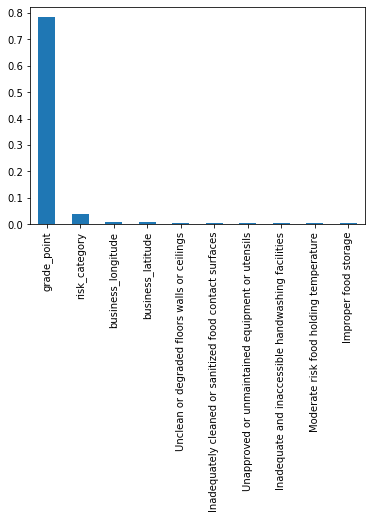

In [51]:
# Feature importance
s = pd.Series(rf.feature_importances_, index=X_train.columns)
s.sort_values(ascending=False)[:10].plot.bar()

In [ ]:
# # Let's go to Colab..

# # Grid search
# # Grid search
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [400, 800], 
#     'max_depth': [20, 40, 80],
#     'min_samples_split': [4, 8, 16], 
#     'min_samples_leaf': [1, 2, 4]
# }
# # Create a based model
# rf = RandomForestRegressor(random_state=RS)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                              cv=3, n_jobs=-1, verbose=2)

In [ ]:
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

In [ ]:
# best_rf = grid_search.best_estimator_
# print('R^2 train: {}, test: {}'.format(best_rf.score(X_train, y_train), best_rf.score(X_test, y_test)))
# # R^2 train: 0.22604356384459667, test: 0.22148444220939167

In [ ]:
# # Feature importance
# s = pd.Series(best_rf.feature_importances_, index=X_train.columns)
# s.sort_values(ascending=False)[:10].plot.bar()

In [53]:
result = rf.predict(X_test)
print(len(result))
result

10774


array([87.16      , 98.37166667, 79.815     , ..., 87.565     ,
       72.66266667, 84.6825    ])

In [ ]:
# # Save the output. 
# file1 = open("preds.csv","w") # "w": write mode 
# file1.write(str(y_pred) + "\n")
# file1.close() 

In [61]:
output_file = 'preds_1.csv'

with open(output_file, mode='w') as f:
    for n in result:
        f.write(str(int(round(n))) + '\n')
        # f.write('\n') This is not necessary.

In [62]:
rf = RandomForestRegressor(n_estimators=800, max_depth=20, min_samples_leaf=4, min_samples_split=16,  random_state=RS)
# {'max_depth': 20,
#  'min_samples_leaf': 4,
#  'min_samples_split': 16,
#  'n_estimators': 800}

In [63]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=16, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=27, verbose=0, warm_start=False)

In [64]:
print('R^2 train: {}, test: {}'.format(rf.score(X_train, y_train), rf.score(X_val, y_val)))

R^2 train: 0.8168968989413261, test: 0.7568228558165003


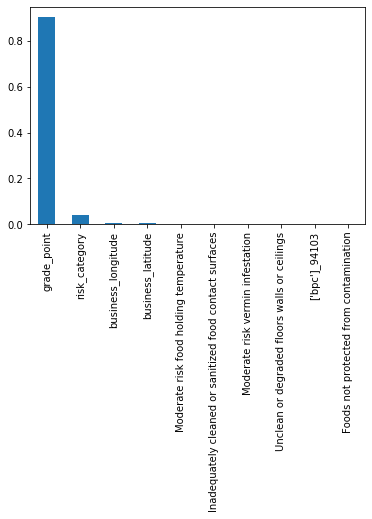

In [65]:
# Feature importance
s = pd.Series(rf.feature_importances_, index=X_train.columns)
s.sort_values(ascending=False)[:10].plot.bar()

In [66]:
result = rf.predict(X_test)
print(len(result))
result

10774


array([92.53262653, 94.64979415, 79.11944999, ..., 82.55272629,
       73.28645313, 86.29386374])

In [67]:
output_file = 'preds.csv'

with open(output_file, mode='w') as f:
    for n in result:
        f.write(str(int(round(n))) + '\n')
        # f.write('\n') This is not necessary.